# Number of participant 

Number of participant is the total people participated in a particular tweet

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

tweetSet='twitter16'
# Define the path to your text file
#file_path = './Data/twitter16/label.txt'
file_path = './Data/'+tweetSet+'/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['false' 'true']


,Label,SourceTweetID
0,False,656955120626880512
1,True,615689290706595840
2,False,613404935003217920
5,True,614467824313106432
9,False,622891631293935616
...,...,...
799,True,552806757672964097
801,True,544350567183556608
805,True,614593386188828672
811,True,650046859537448960


In [2]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
# bool(dict_of_lists[656955120626880512])

In [3]:
# df_filtered_true = df_filtered[df_filtered['Label'].isin(['true'])]
# len(df_filtered_true['SourceTweetID'].unique())
rumor_tweet_id= df_filtered['SourceTweetID'].unique()
# len(df_filtered_true['SourceTweetID'])

In [4]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/'+tweetSet+'/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
number_of_participants=[]
incidents_count=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        sender_tweet_id.append(filename.replace(".txt",""))
        tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
        delayVal=0
        count=0
        #print(filename.replace(".txt","") ,' is present')
        Current_Sender_uid=""
        Current_receiver_list=set()
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                if sender_values[0]=='ROOT':
                    Current_Sender_uid=receiver_values[0]
                
                if receiver_values[0]!=Current_Sender_uid:
                    Current_receiver_list.add(receiver_values[0])
                
                        
#                 if sender_values[0]!='ROOT':
#                     if float(receiver_values[2]) >delayVal:
#                         delayVal=float(receiver_values[2])
#                 sender_uid.append(sender_values[0])
#                 sender_tweet_id.append(sender_values[1])
#                 sender_post_time_delay.append(float(sender_values[2]))

#                 receiver_uid.append(receiver_values[0])
#                 receiver_tweet_id.append(receiver_values[1])
#                 receiver_post_time_delay.append(float(receiver_values[2]))
                
#                 #print(int(filename.replace(".txt","")))
#                 tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
            #receiver_post_time_delay.append(delayVal)
            number_of_participants.append(len(Current_receiver_list))


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_tweet_id': sender_tweet_id,
    #'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label,
    'Participant_count':number_of_participants
})
# dfRoot=df_Joined[df_Joined['sender_uid'] == 'ROOT']
# df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_tweet_id,tweet_label,Participant_count
0,498430783699554305,True,266
1,500378223977721856,True,91
2,524922729485848576,True,108
3,524923462398513152,True,157
4,524923676484177920,True,356
...,...,...,...
407,676718762830221312,False,179
408,676870737932742656,False,181
409,677099574855639044,False,125
410,681147789653356544,True,288


In [5]:
# # Separate the DataFrame into two subsets based on tweet_label
# true_subset = df_Joined[df_Joined['tweet_label'] == True]
# false_subset = df_Joined[df_Joined['tweet_label'] == False]

# # Sort each subset by Participant_count in descending order
# true_subset = true_subset.sort_values(by='Participant_count', ascending=False)
# false_subset = false_subset.sort_values(by='Participant_count', ascending=False)

# # Drop the top 10 rows from each subset
# true_subset = true_subset.iloc[5:]
# false_subset = false_subset.iloc[5:]

# # Concatenate the two subsets back together
# df_Joined = pd.concat([true_subset, false_subset])

# # If you want to reset the index of the final DataFrame
# df_Joined.reset_index(drop=True, inplace=True)
# df_Joined

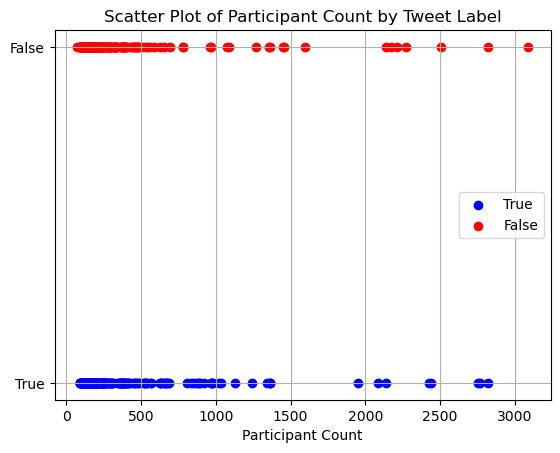

In [6]:
# Separate the data by 'tweet_label'
true_data = df_Joined[df_Joined['tweet_label'] == True]
false_data = df_Joined[df_Joined['tweet_label'] == False]

# Create a scatter plot for 'True' values
plt.scatter(true_data['Participant_count'], [1] * len(true_data), label='True', color='blue', marker='o')

# Create a scatter plot for 'False' values
plt.scatter(false_data['Participant_count'], [2] * len(false_data), label='False', color='red', marker='o')

# Customize the plot
plt.xlabel('Participant Count')
plt.yticks([1, 2], ['True', 'False'])
plt.title('Scatter Plot of Participant Count by Tweet Label')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()




In [7]:
average_counts = df_Joined.groupby('tweet_label')['Participant_count'].mean()
average_counts

tweet_label
False    366.560976
True     407.801932
Name: Participant_count, dtype: float64

In [8]:
true_data['Participant_count'].sum()/true_data['Participant_count'].count()

407.80193236714973

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


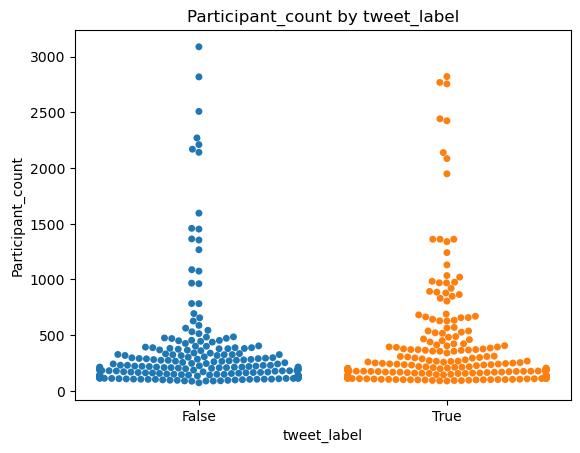

In [9]:
import seaborn as sns
sns.swarmplot(x='tweet_label', y='Participant_count', data=df_Joined)
plt.xlabel('tweet_label')
plt.ylabel('Participant_count')
plt.title('Participant_count by tweet_label')
plt.show()

# Twitter 15

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md

tweetSet='twitter15'
# Define the path to your text file
#file_path = './Data/twitter16/label.txt'
file_path = './Data/'+tweetSet+'/label.txt'

# Initialize empty lists to store the data
labels = []
values = []

# Read the file line by line and extract the data
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove any leading/trailing whitespace
        label, value = line.split(':')  # Split the line into label and value
        labels.append(label)
        values.append(int(value))  # Convert the value to an integer

# Create a DataFrame from the lists
df = pd.DataFrame({'Label': labels, 'SourceTweetID': values})

# Optionally, you can filter the DataFrame based on specific labels:
#df_filtered = df[df['Label'].isin(['true', 'false'])]
df = df[df['Label'].isin(['true', 'false'])]
df_filtered =df.copy()

df_filtered['Label'] = df['Label'].str.lower().replace({'true': True, 'false': False})

distinct_labels = df['Label'].unique()
print(distinct_labels)

# Display the DataFrame
df_filtered


['true' 'false']


,Label,SourceTweetID
4,True,551099691702956032
7,True,514106273852174337
9,False,495366618818830336
10,False,532206910796468224
11,False,560187970389819392
...,...,...
1480,True,528242965915779072
1481,True,407205235682050048
1482,True,508002575858561024
1484,True,427780584979836929


In [11]:


#df_filtered['Label']=df_filtered['Label'].astype(bool)
df_filtered_dict = df_filtered.set_index('SourceTweetID')['Label'].to_dict()
# bool(dict_of_lists[656955120626880512])

In [12]:
# df_filtered_true = df_filtered[df_filtered['Label'].isin(['true'])]
# len(df_filtered_true['SourceTweetID'].unique())
rumor_tweet_id= df_filtered['SourceTweetID'].unique()
# len(df_filtered_true['SourceTweetID'])

In [13]:
import os
import pandas as pd

# Define the path to your folder containing files
folder_path ='./Data/'+tweetSet+'/tree' #'./Data/testtree'


# Initialize empty lists to store the extracted data
sender_uid = []
sender_tweet_id = []
sender_post_time_delay = []
receiver_uid = []
receiver_tweet_id = []
receiver_post_time_delay = []
tweet_label=[]
number_of_participants=[]
counter=0
# Iterate through the files in the folder
for filename in os.listdir(folder_path):
#     counter=counter+1
#     if counter>10000:
#         break
    file_path = os.path.join(folder_path, filename)
    if int(filename.replace(".txt","")) in rumor_tweet_id: 
        sender_tweet_id.append(filename.replace(".txt",""))
        tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
        delayVal=0
        #print(filename.replace(".txt","") ,' is present')
        Current_Sender_uid=""
        Current_receiver_list=set()
            # Open and read each file
        with open(file_path, 'r') as file:
            for line in file:
                # Split the line to extract the sender and receiver data
                sender_data, receiver_data = line.strip().split('->')

                sender_values = sender_data.strip('[]').replace("'", "").split(', ')
                receiver_values = receiver_data.strip('[]').replace("'", "").split(', ')

                if sender_values[0]=='ROOT':
                    Current_Sender_uid=receiver_values[0]
                
                if receiver_values[0]!=Current_Sender_uid:
                    Current_receiver_list.add(receiver_values[0])
                
                        
#                 if sender_values[0]!='ROOT':
#                     if float(receiver_values[2]) >delayVal:
#                         delayVal=float(receiver_values[2])
#                 sender_uid.append(sender_values[0])
#                 sender_tweet_id.append(sender_values[1])
#                 sender_post_time_delay.append(float(sender_values[2]))

#                 receiver_uid.append(receiver_values[0])
#                 receiver_tweet_id.append(receiver_values[1])
#                 receiver_post_time_delay.append(float(receiver_values[2]))
                
#                 #print(int(filename.replace(".txt","")))
#                 tweet_label.append(df_filtered_dict[int(filename.replace(".txt",""))])
    #else: 
        #print(filename.replace(".txt","") ,' is NOT present')
    
            #receiver_post_time_delay.append(delayVal)
            number_of_participants.append(len(Current_receiver_list))


# Create a DataFrame from the extracted data
df_Joined = pd.DataFrame({
    'sender_tweet_id': sender_tweet_id,
    #'receiver_post_time_delay': receiver_post_time_delay,
    'tweet_label':tweet_label,
    'Participant_count':number_of_participants
})
# dfRoot=df_Joined[df_Joined['sender_uid'] == 'ROOT']
# df_Joined = df_Joined[df_Joined['sender_uid'] != 'ROOT']
# Print the DataFrame
df_Joined

,sender_tweet_id,tweet_label,Participant_count
0,265953285247209472,False,211
1,273182568298450945,False,353
2,273278761909239808,False,385
3,295152287901417472,True,102
4,295944137948151809,False,1990
...,...,...,...
737,574004164570841088,True,157
738,574062768896212992,True,228
739,80080680482123777,False,100
740,80084555733803009,False,165


In [14]:
# # Separate the DataFrame into two subsets based on tweet_label
# true_subset = df_Joined[df_Joined['tweet_label'] == True]
# false_subset = df_Joined[df_Joined['tweet_label'] == False]

# # Sort each subset by Participant_count in descending order
# true_subset = true_subset.sort_values(by='Participant_count', ascending=False)
# false_subset = false_subset.sort_values(by='Participant_count', ascending=False)

# # Drop the top 10 rows from each subset
# true_subset = true_subset.iloc[5:]
# false_subset = false_subset.iloc[5:]

# # Concatenate the two subsets back together
# df_Joined = pd.concat([true_subset, false_subset])

# # If you want to reset the index of the final DataFrame
# df_Joined.reset_index(drop=True, inplace=True)
# df_Joined

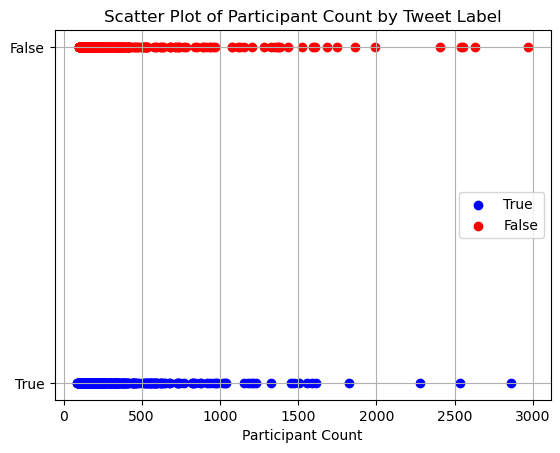

In [15]:
# Separate the data by 'tweet_label'
true_data = df_Joined[df_Joined['tweet_label'] == True]
false_data = df_Joined[df_Joined['tweet_label'] == False]

# Create a scatter plot for 'True' values
plt.scatter(true_data['Participant_count'], [1] * len(true_data), label='True', color='blue', marker='o')

# Create a scatter plot for 'False' values
plt.scatter(false_data['Participant_count'], [2] * len(false_data), label='False', color='red', marker='o')

# Customize the plot
plt.xlabel('Participant Count')
plt.yticks([1, 2], ['True', 'False'])
plt.title('Scatter Plot of Participant Count by Tweet Label')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()




In [16]:
average_counts = df_Joined.groupby('tweet_label')['Participant_count'].mean()
average_counts

tweet_label
False    354.945946
True     327.448925
Name: Participant_count, dtype: float64

In [17]:
true_data['Participant_count'].sum()/true_data['Participant_count'].count()

327.4489247311828

C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sanja\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


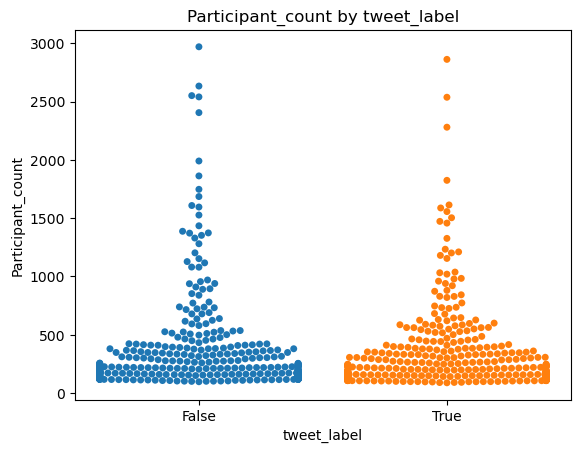

In [18]:
import seaborn as sns
sns.swarmplot(x='tweet_label', y='Participant_count', data=df_Joined)
plt.xlabel('tweet_label')
plt.ylabel('Participant_count')
plt.title('Participant_count by tweet_label')
plt.show()